

# Project: Investigate the TMDB movie dataset


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I have conducted data analysis on a data set that contains information about 10,000 movies collected from The Movie Database (TMDb) including user ratings and revenue 

# Questions for analysis
>Which genres are most popular from year to year?

>Which genres are have highest revenues from year to year?

>What kinds of properties are associated with movies that have high revenues?

>How is runtime correlated with vote average, revenue and popularity?




In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [178]:
# Loading, reading and inspecting the data
df= pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.986,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.500,2015,137999939.280,1392445892.524
1,76341,tt1392190,28.420,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.100,2015,137999939.280,348161292.489
2,262500,tt2908446,13.113,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.300,2015,101199955.472,271619025.408
3,140607,tt2488496,11.173,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.500,2015,183999919.040,1902723129.802
4,168259,tt2820852,9.335,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.300,2015,174799923.088,1385748801.471


In [170]:
df.shape

(10866, 21)

In [171]:
sum(df.duplicated())

1

In [172]:
#no. of null values column wise 
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [173]:
#no. of null values in the dataframe
df.isna().sum().sum()

13434

In [289]:
#Data types of each column
df.dtypes

id                  int64
imdb_id            object
popularity        float64
budget              int64
revenue             int64
original_title     object
director           object
runtime             int64
genres             object
release_date       object
vote_count          int64
vote_average      float64
release_year        int64
budget_adj        float64
revenue_adj       float64
dtype: object

In [175]:
#no. of unique values in each column
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64



### Data Cleaning - Fixing formatting, data types, missing values, null and zero values, dropping unwanted columns

In [182]:
#Dropping unwanted columns
df.drop(['homepage', 'tagline','overview','keywords', 'production_companies', 'cast'], axis = 1,inplace=True)

In [183]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.986,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.500,2015,137999939.280,1392445892.524
1,76341,tt1392190,28.420,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.100,2015,137999939.280,348161292.489
2,262500,tt2908446,13.113,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.300,2015,101199955.472,271619025.408
3,140607,tt2488496,11.173,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.500,2015,183999919.040,1902723129.802
4,168259,tt2820852,9.335,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.300,2015,174799923.088,1385748801.471


In [184]:
#Drop rows with null values
df.dropna(inplace=True)

In [185]:
#Checking for null values in dataframe
df.isnull().sum().any()

False

In [186]:
#Removing duplicates
df.drop_duplicates(inplace=True)

In [187]:
#Checking for duplicates
sum(df.duplicated())

0

In [188]:
#Checking the new dimensions of the dataframe
df.shape

(10795, 15)

In [189]:
#Removing budget and revenue with '0' value
df = df.loc[~((df['budget'] == 0) | (df['revenue'] == 0))]

In [190]:
df.shape

(3853, 15)

In [191]:
#Changing scientific format to standard format for budget_adj and revenue_adj
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [192]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.986,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.500,2015,137999939.280,1392445892.524
1,76341,tt1392190,28.420,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.100,2015,137999939.280,348161292.489
2,262500,tt2908446,13.113,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.300,2015,101199955.472,271619025.408
3,140607,tt2488496,11.173,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.500,2015,183999919.040,1902723129.802
4,168259,tt2820852,9.335,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.300,2015,174799923.088,1385748801.471


In [193]:
#Splitting genre into individual strings and assigning each string to a new row using explode
dfnew=df.assign(genre=df['genres'].str.split('|')).explode('genre')

In [194]:
dfnew.head()

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre
0,135397,tt0369610,32.986,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.500,2015,137999939.280,1392445892.524,Action
0,135397,tt0369610,32.986,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.500,2015,137999939.280,1392445892.524,Adventure
0,135397,tt0369610,32.986,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.500,2015,137999939.280,1392445892.524,Science Fiction
0,135397,tt0369610,32.986,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.500,2015,137999939.280,1392445892.524,Thriller
1,76341,tt1392190,28.420,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.100,2015,137999939.280,348161292.489,Action


In [195]:
#Drop genres which is unwanted and has aggregated strings 
dfnew=dfnew.drop(columns=['genres'])

In [196]:
dfnew.head()

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre
0,135397,tt0369610,32.986,150000000,1513528810,Jurassic World,Colin Trevorrow,124,6/9/15,5562,6.500,2015,137999939.280,1392445892.524,Action
0,135397,tt0369610,32.986,150000000,1513528810,Jurassic World,Colin Trevorrow,124,6/9/15,5562,6.500,2015,137999939.280,1392445892.524,Adventure
0,135397,tt0369610,32.986,150000000,1513528810,Jurassic World,Colin Trevorrow,124,6/9/15,5562,6.500,2015,137999939.280,1392445892.524,Science Fiction
0,135397,tt0369610,32.986,150000000,1513528810,Jurassic World,Colin Trevorrow,124,6/9/15,5562,6.500,2015,137999939.280,1392445892.524,Thriller
1,76341,tt1392190,28.420,150000000,378436354,Mad Max: Fury Road,George Miller,120,5/13/15,6185,7.100,2015,137999939.280,348161292.489,Action


In [198]:
#Change 'release_date' from string to datetime format
dfnew['release_date'] = pd.to_datetime(dfnew['release_date'])

In [199]:
dfnew.head()

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre
0,135397,tt0369610,32.986,150000000,1513528810,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.500,2015,137999939.280,1392445892.524,Action
0,135397,tt0369610,32.986,150000000,1513528810,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.500,2015,137999939.280,1392445892.524,Adventure
0,135397,tt0369610,32.986,150000000,1513528810,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.500,2015,137999939.280,1392445892.524,Science Fiction
0,135397,tt0369610,32.986,150000000,1513528810,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.500,2015,137999939.280,1392445892.524,Thriller
1,76341,tt1392190,28.420,150000000,378436354,Mad Max: Fury Road,George Miller,120,2015-05-13,6185,7.100,2015,137999939.280,348161292.489,Action


In [200]:
#Confirming the changed datatype of release_date
dfnew.dtypes

id                         int64
imdb_id                   object
popularity               float64
budget                     int64
revenue                    int64
original_title            object
director                  object
runtime                    int64
release_date      datetime64[ns]
vote_count                 int64
vote_average             float64
release_year               int64
budget_adj               float64
revenue_adj              float64
genre                     object
dtype: object

In [201]:
#Store the new file to a csv
dfnew.to_csv('tmdb-movies-edited.csv')

In [202]:
dfnew.head()

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre
0,135397,tt0369610,32.986,150000000,1513528810,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.500,2015,137999939.280,1392445892.524,Action
0,135397,tt0369610,32.986,150000000,1513528810,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.500,2015,137999939.280,1392445892.524,Adventure
0,135397,tt0369610,32.986,150000000,1513528810,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.500,2015,137999939.280,1392445892.524,Science Fiction
0,135397,tt0369610,32.986,150000000,1513528810,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.500,2015,137999939.280,1392445892.524,Thriller
1,76341,tt1392190,28.420,150000000,378436354,Mad Max: Fury Road,George Miller,120,2015-05-13,6185,7.100,2015,137999939.280,348161292.489,Action


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Which genres are most popular from year to year?

In [204]:
dfnew.shape

(10299, 15)

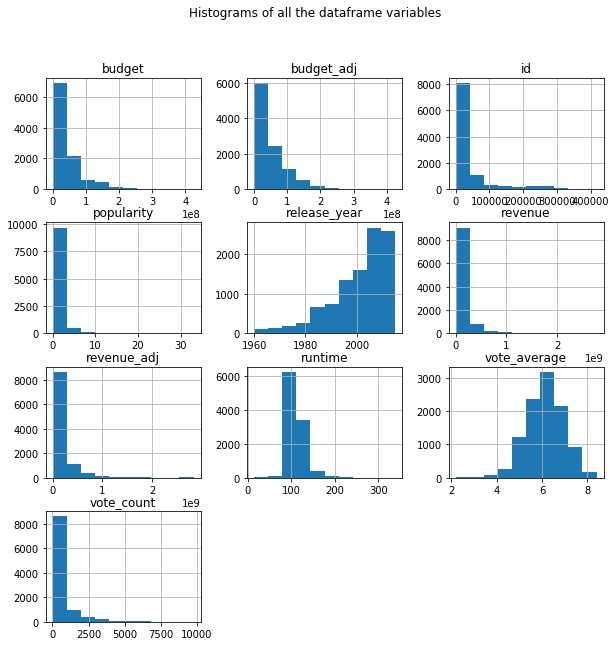

In [332]:
#Histograms of all the dataframe variables to see their distributions
dfnew.hist(figsize=(10,10));
plt.suptitle('Histograms of all the dataframe variables');

Vote average is normally distributed and release year is skewed left. Rest all variables are right skewed.

In [203]:
#Finding the overall popularity by genre 
totalpop=dfnew.groupby('genre')['popularity'].mean()
totalpop=totalpop.to_frame(name = 'mean').reset_index()
totalpop

,genre,mean
0,Action,1.567
1,Adventure,1.868
2,Animation,1.711
3,Comedy,1.013
4,Crime,1.124
5,Documentary,0.294
6,Drama,1.002
7,Family,1.459
8,Fantasy,1.754
9,Foreign,0.182


Above, we see the popularity for each genre across all the years 

In [288]:
# Overall popularity by genre sorted in descending order  
totalpopsort=totalpop.sort_values('mean', ascending=False)
totalpopsort

,genre,mean
15,Science Fiction,1.873
1,Adventure,1.868
8,Fantasy,1.754
2,Animation,1.711
0,Action,1.567
7,Family,1.459
17,Thriller,1.259
18,War,1.246
13,Mystery,1.143
19,Western,1.134


Above, we see that across all years Science Fiction, Adventure, Fantasy and Animation have the highest popularity

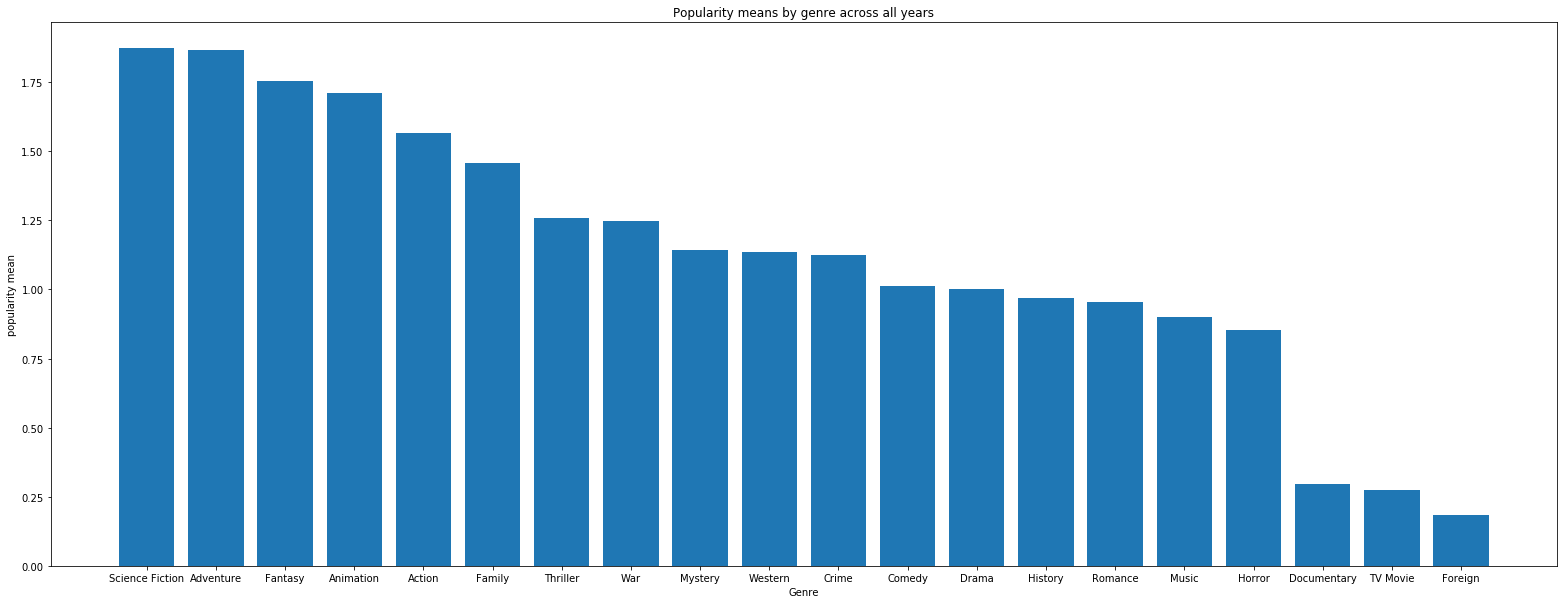

In [262]:
#Plotting overall popularity by genre 
totalpop.sort_values('mean',inplace=True, ascending=False)
plt.figure(figsize=(27,10))
plt.bar(totalpop['genre'], totalpop['mean'])
plt.title('Popularity means by genre across all years')
plt.xlabel('Genre')
plt.ylabel('popularity mean');

From the plot, the same thing is confirmed as in the sort operation in a visual manner - we see that across all years Science Fiction, Adventure, Fantasy and Animation have the highest popularity

In [220]:
#Finding popularity mean by genre from year to year 
genyeardf = dfnew.groupby(['release_year','genre'])['popularity'].mean()
genyeardf

release_year  genre          
1960          Action            1.505
              Adventure         1.872
              Comedy            0.502
              Drama             1.565
              History           1.137
                                 ... 
2015          Romance           2.108
              Science Fiction   7.595
              Thriller          3.913
              War               1.943
              Western           7.505
Name: popularity, Length: 842, dtype: float64

In [219]:
#Unstacking the above group by object
genyeardf1 = genyeardf.unstack()
genyeardf1.head()

genre,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,,
1960,1.505,1.872,nan,0.502,nan,nan,1.565,nan,nan,nan,1.137,2.610,nan,nan,0.502,nan,nan,2.610,nan,1.872
1961,0.464,1.693,2.632,1.245,0.900,nan,0.753,1.468,nan,nan,0.538,0.250,0.900,nan,1.752,nan,nan,nan,0.755,0.174
1962,1.848,1.622,nan,nan,0.811,nan,0.641,nan,nan,nan,1.169,nan,nan,nan,nan,nan,nan,3.171,1.169,0.517
1963,1.358,1.586,nan,0.920,nan,nan,0.559,nan,nan,nan,0.559,1.139,nan,0.920,0.862,nan,nan,1.364,0.664,nan
1964,3.154,3.154,nan,1.670,0.663,nan,0.923,1.311,1.988,nan,nan,nan,1.145,0.663,0.408,nan,nan,1.909,2.210,nan


In [228]:
#Extracting the genre (column name here) of value which is maximum popularity mean in every year (in each row here) 
# and converting this series into a dataframe
maxpopgenre=genyeardf1.idxmax(axis=1)
maxpopgenre = pd.DataFrame(maxpopgenre, columns = ['genre'])
maxpopgenre.head()

,genre
release_year,
1960,Horror
1961,Animation
1962,Thriller
1963,Adventure
1964,Action


In [229]:
#Extracting the maximum popularity mean value in every year (in each row here) 
# and converting this series into a dataframe
maxpopmean=genyeardf1.max(axis=1)
maxpopmean = pd.DataFrame(maxpopmean, columns = ['mean_popularity'])
maxpopmean.head()

,mean_popularity
release_year,
1960,2.610
1961,2.632
1962,3.171
1963,1.586
1964,3.154


In [230]:
#Merging the maximum popularity mean value in each year and its corresponding genre name
merged_mean_genre = pd.merge(maxpopgenre, maxpopmean, left_index = True, right_index = True)
merged_mean_genre

,genre,mean_popularity
release_year,,
1960,Horror,2.610
1961,Animation,2.632
1962,Thriller,3.171
1963,Adventure,1.586
1964,Action,3.154
1965,Thriller,1.910
1966,Drama,0.485
1967,Animation,2.551
1968,Mystery,1.729


Above shows the most popular genre every year and the corresponding mean popularity value and thus answers our question (Which genres are most popular from year to year) . Let us analyse this further for a clearer picture.

In [278]:
# Popularity mean by genre year to year sorted in descending order  
sortpopdf=merged_mean_genre.sort_values('mean_popularity', ascending=False)
sortpopdf

,genre,mean_popularity
release_year,,
2015,Science Fiction,7.595
2012,Western,5.945
2014,Science Fiction,5.483
1992,Animation,3.967
1962,Thriller,3.171
1964,Action,3.154
2003,Fantasy,2.909
2001,Fantasy,2.903
2013,Science Fiction,2.883


Above shows that among the popular genres every year, Science Fiction, Western and Thriller, Action, Fantasy, Horror have had the highest mean popularity ratings

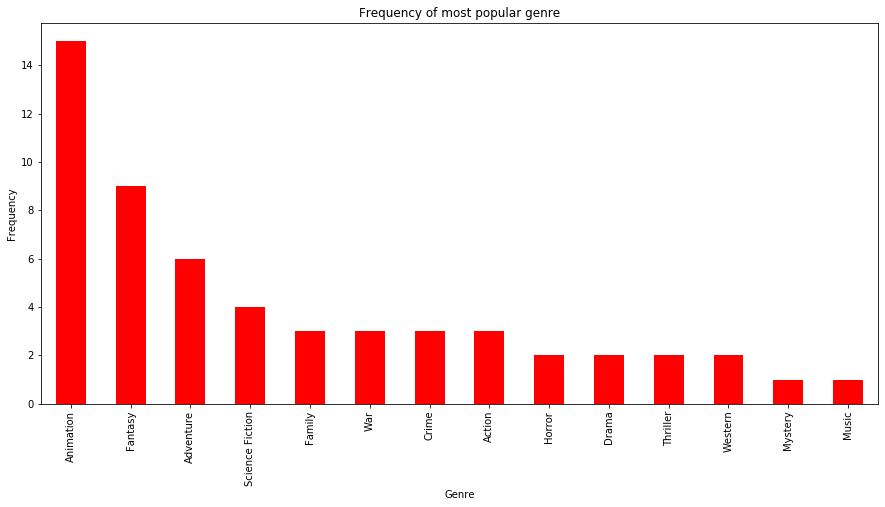

In [237]:
#Plotting the frequency of how many times a genre was the most popular 
merged_mean_genre['genre'].value_counts().plot(kind = 'bar',figsize = (15,7), color = 'red')
plt.title('Frequency of most popular genre')
plt.xlabel('Genre')
plt.ylabel('Frequency');

Above plot shows that Animation, Fantasy and Adventure were the highest popular genres most number of times.

### Research Question 2: Which genres generate highest revenue from year to year?

In [290]:
#Finding the overall revenue mean by genre 
totalrev=dfnew.groupby('genre')['revenue_adj'].mean()
totalrev=totalrev.to_frame(name = 'mean').reset_index()
totalrev


,genre,mean
0,Action,195387938.297
1,Adventure,271407469.108
2,Animation,290957382.264
3,Comedy,121389713.414
4,Crime,110395135.210
5,Documentary,24806165.833
6,Drama,101429884.169
7,Family,243791030.515
8,Fantasy,249992751.604
9,Foreign,12866538.205


In [292]:
# Overall revenue mean by genre sorted in descending order
totalrevsort=totalrev.sort_values('mean', ascending=False)
totalrevsort


,genre,mean
2,Animation,290957382.264
1,Adventure,271407469.108
8,Fantasy,249992751.604
7,Family,243791030.515
15,Science Fiction,202153142.410
0,Action,195387938.297
18,War,155898111.708
19,Western,135674767.388
12,Music,134566015.889
17,Thriller,128170894.619


Above, we see that across all years Animation, Adventurem Fantasy, Family and Science Fiction have the revenue

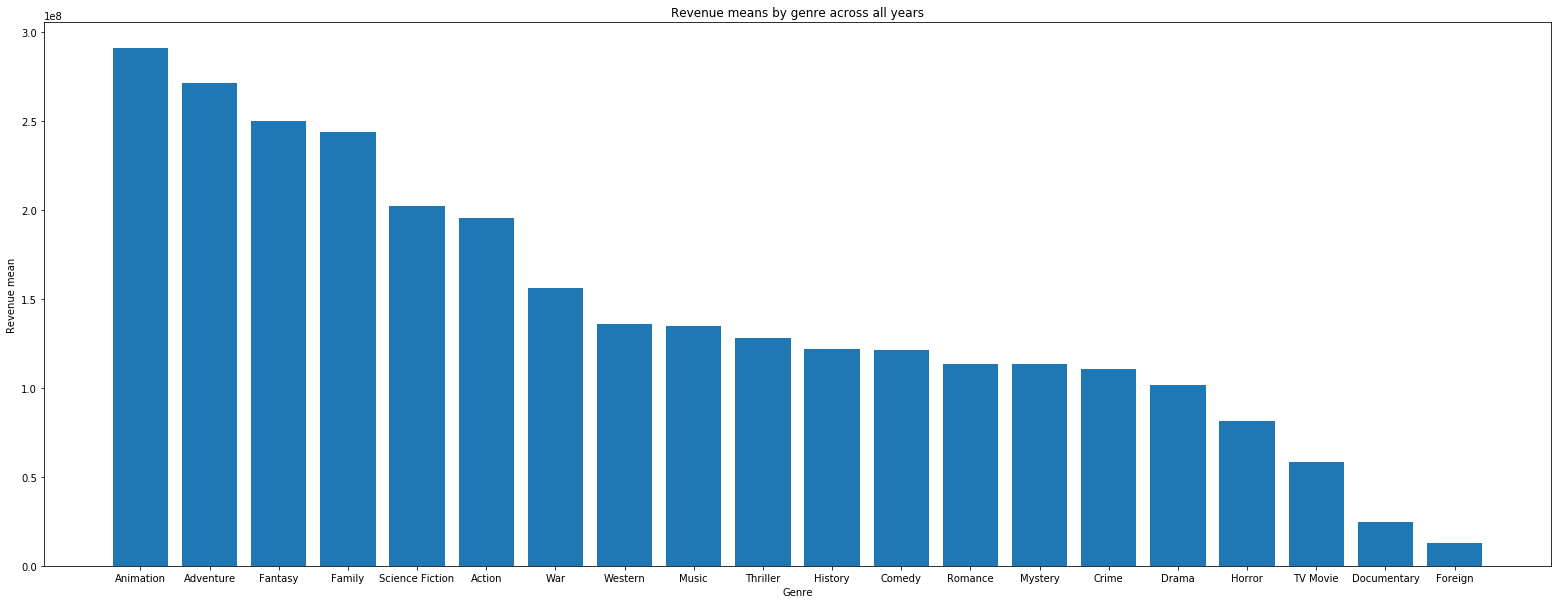

In [293]:
#Plotting overall revenue mean by genre 
totalrev.sort_values('mean',inplace=True, ascending=False)
plt.figure(figsize=(27,10))
plt.bar(totalrev['genre'], totalrev['mean'])
plt.title('Revenue means by genre across all years')
plt.xlabel('Genre')
plt.ylabel('Revenue mean');


From the plot, the same thing is confirmed as in the sort operation in a visual manner -we see that across all years Animation, Adventurem Fantasy, Family and Science Fiction have the highest revenue

In [263]:
#Finding the mean revenue by genre and unstacking the groupby object
genrev = dfnew.groupby(['release_year','genre'])['revenue_adj'].mean()
newdf1 = genrev.unstack()
newdf1.head()

genre,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,,
1960,239271226.405,36164405.378,nan,118336127.688,nan,nan,287545730.831,nan,nan,nan,442378047.432,235934958.630,nan,nan,118336127.688,nan,nan,235934958.630,nan,36164405.378
1961,121094696.052,892818114.308,1574814739.705,427442418.013,318470457.271,nan,135611681.407,801997092.268,nan,nan,72948612.080,14589722.416,318470457.271,nan,69301181.476,nan,nan,nan,210821488.910,31367903.194
1962,395022998.556,431545806.209,nan,nan,94645823.677,nan,200005400.570,nan,nan,nan,504591421.513,nan,nan,nan,nan,nan,nan,429623553.174,504591421.513,209045017.484
1963,316487576.355,298687127.926,nan,95941483.518,nan,nan,172664349.760,nan,nan,nan,172664349.760,81195171.949,nan,95941483.518,253565921.113,nan,nan,231105246.457,35600896.858,nan
1964,878080399.544,878080399.544,nan,264135461.067,49211871.872,nan,176530492.730,612591936.564,719004619.589,nan,nan,nan,410739333.385,49211871.872,295271231.232,nan,nan,463646135.708,66367636.586,nan


In [264]:
#Extracting the genre (column name here) of value which is maximum revenue mean in every year (in each row here) 

maxrevgenre=newdf1.idxmax(axis=1)
maxrevgenre.head()

release_year
1960      History
1961    Animation
1962      History
1963       Action
1964       Action
dtype: object

In [265]:
# converting above generated series into a dataframe
maxrevgenre = pd.DataFrame(maxrevgenre, columns = ['genre'])
maxrevgenre.head()

,genre
release_year,
1960,History
1961,Animation
1962,History
1963,Action
1964,Action


In [266]:
#Extracting the maximum revenue mean value in every year (in each row here) 
# and converting this series into a dataframe
maxrevmean=newdf1.max(axis=1)
maxrevmean = pd.DataFrame(maxrevmean, columns = ['mean_revenue'])
maxrevmean.head()

,mean_revenue
release_year,
1960,442378047.432
1961,1574814739.705
1962,504591421.513
1963,316487576.355
1964,878080399.544


In [273]:
#Merging the maximum revenue mean value in each year and its corresponding genre name
mergedrev_mean_genre = pd.merge(maxrevgenre, maxrevmean, left_index = True, right_index = True)
mergedrev_mean_genre

,genre,mean_revenue
release_year,,
1960,History,442378047.432
1961,Animation,1574814739.705
1962,History,504591421.513
1963,Action,316487576.355
1964,Action,878080399.544
1965,Family,1129534861.994
1966,Drama,180501933.109
1967,Animation,1345551058.988
1968,Crime,265182633.717


Above shows the most revenue generating genre every year and the corresponding mean revenue value and thus answers our question (Which genres generate highest revenue from year to year) . Let us analyse this further for a clearer picture.

In [276]:
# Revenue mean by genre year to year sorted in descending order
sortrevdf=mergedrev_mean_genre.sort_values('mean_revenue', ascending=False)
sortrevdf

,genre,mean_revenue
release_year,,
1973,Horror,2167324901.200
1961,Animation,1574814739.705
1967,Animation,1345551058.988
1975,Horror,1182212665.102
1965,Family,1129534861.994
1964,Action,878080399.544
1992,Animation,783306265.857
1990,Western,707961527.216
1977,Science Fiction,676494750.298


Above shows that among the highest revenue generating genres every year, Horror, animation, action, science fiction, adventure  have had the highest mean revenues.

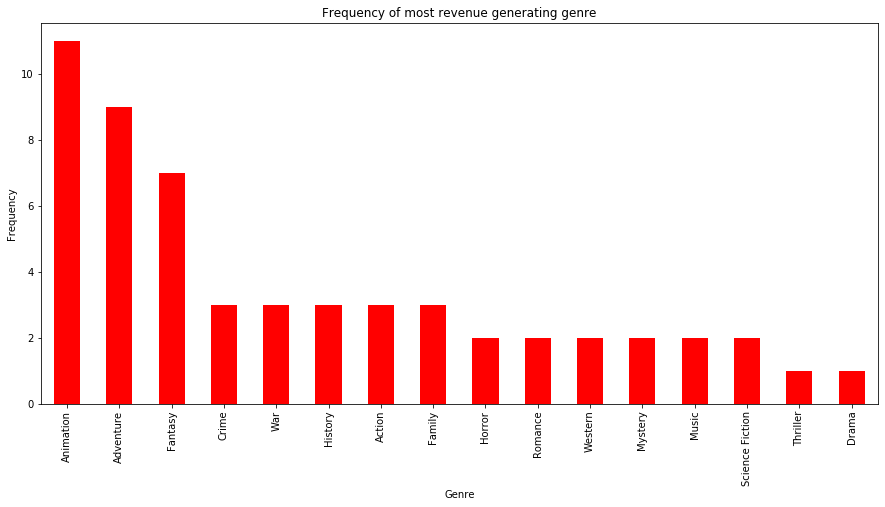

In [275]:
#Plotting the frequency of how many times a genre was the most revenue generating
mergedrev_mean_genre['genre'].value_counts().plot(kind = 'bar',figsize = (15,7), color = 'red')
plt.title('Frequency of most revenue generating genre')
plt.xlabel('Genre')
plt.ylabel('Frequency');

Above plot shows that Animation, Adventure and Fantasy were the highest revenue generating genres most number of times. Interestingly the same was the case with popularity as well. 

### Research Question 3:  What kinds of properties are associated with movies that have high revenues?


In [238]:
#Understanding the statistical measures of each variable
dfnew.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10299.000,10299.000,10299.000,10299.000,10299.000,10299.000,10299.000,10299.000,10299.000,10299.000
mean,36353.763,1.263,41654237.683,119715025.152,109.552,574.311,6.156,2000.919,49552569.391,151798755.882
std,63117.226,1.608,45326457.846,192332308.985,20.340,940.546,0.790,11.279,47664345.543,232443889.093
min,5.000,0.001,1.000,2.000,15.000,10.000,2.200,1960.000,0.969,2.371
25%,5548.000,0.477,11000000.000,14867514.000,96.000,76.000,5.700,1995.000,15540242.546,20428832.917
50%,11036.000,0.843,25100000.000,50549107.000,106.000,225.000,6.200,2004.000,34543447.885,68479093.556
75%,34786.000,1.462,57000000.000,141058519.500,119.000,634.000,6.700,2010.000,69603115.340,182591994.713
max,417859.000,32.986,425000000.000,2781505847.000,338.000,9767.000,8.400,2015.000,425000000.000,2827123750.412


In [240]:
#Finding the correlation between each variable
dfnew.corr()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000,0.206,0.007,0.022,-0.033,0.131,0.018,0.475,-0.094,-0.066
popularity,0.206,1.000,0.443,0.616,0.210,0.770,0.324,0.190,0.394,0.546
budget,0.007,0.443,1.000,0.679,0.246,0.567,0.040,0.307,0.957,0.526
revenue,0.022,0.616,0.679,1.000,0.245,0.763,0.245,0.165,0.647,0.903
runtime,-0.033,0.210,0.246,0.245,1.000,0.275,0.339,-0.118,0.324,0.278
vote_count,0.131,0.770,0.567,0.763,0.275,1.000,0.403,0.232,0.506,0.662
vote_average,0.018,0.324,0.040,0.245,0.339,0.403,1.000,-0.125,0.052,0.283
release_year,0.475,0.190,0.307,0.165,-0.118,0.232,-0.125,1.000,0.109,-0.080
budget_adj,-0.094,0.394,0.957,0.647,0.324,0.506,0.052,0.109,1.000,0.562
revenue_adj,-0.066,0.546,0.526,0.903,0.278,0.662,0.283,-0.080,0.562,1.000


We see that revenue_adj has moderate positive correlation with popularity, budget_adj and vote count. Since popularity and vote count are output variables, let us focus on budget_adj which is an input variable.

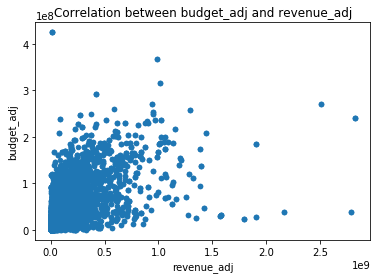

In [304]:
#Visual plotting of correlation between budget_adj and revenue_adj
dfnew.plot(x='revenue_adj', y='budget_adj', kind='scatter', title='Correlation between budget_adj and revenue_adj');

Above plot also confirms a moderately postive correlation between budget_adj and revenue_adj. Let us analyse budget_adj's effect further on revenue_adj.

In [251]:
# get the median value of budget_adj
dfnew['budget_adj'].median()

34543447.885163695

In [279]:
# select values with budget less than the median
low_budget = dfnew.query('budget_adj < 34543447.885163695')

# select values with budget  greater than or equal to the median
high_budget =dfnew.query('budget_adj >= 34543447.885163695')

In [280]:
# get mean revenue_adj for the low budget group
low_budget['revenue_adj'].mean()

65892674.71822155

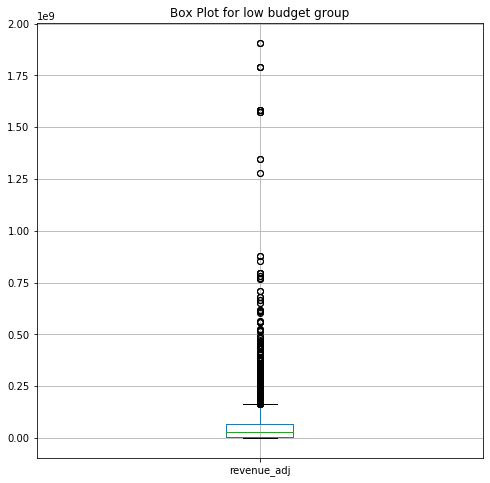

In [328]:
#Boxplot of revenue for low budget group to see their distributions
low_budget.boxplot(column=['revenue_adj'],figsize=(8,8));
plt.title('Box Plot for low budget group');

In [281]:
# get mean revenue_adj for the high budget group
high_budget['revenue_adj'].mean()

237654804.38322645

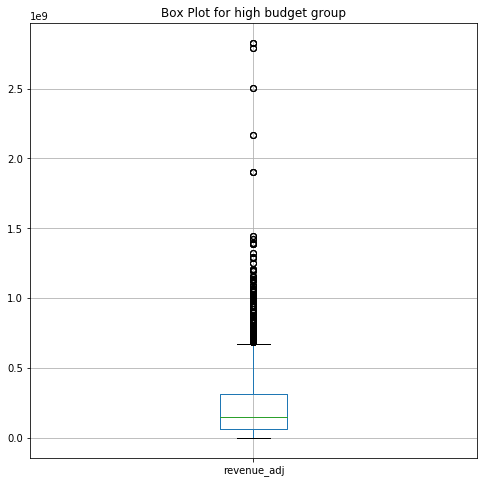

In [329]:
#Boxplot of revenue for high budget group to see their distributions
high_budget.boxplot(column=['revenue_adj'],figsize=(8,8));
plt.title('Box Plot for high budget group');

We see that low budget group has much lower mean revenue than high budget group. The means differ by around 171 million dollars. 

Also both low and high budget group's revenues have outliers and high budget group's revenue values are higher and relatively more normally distributed.

### Research Question 4: How is runtime correlated with vote average, revenue and popularity

In [282]:
#Finding the correlation between runtime and vote average
dfnew[['vote_average','runtime']].corr()

,vote_average,runtime
vote_average,1.000,0.339
runtime,0.339,1.000


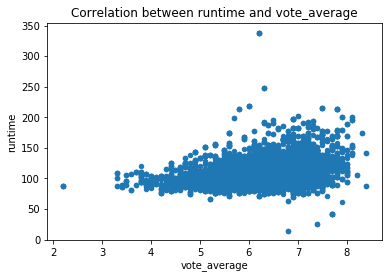

In [305]:
#Plotting the correlation between runtime and vote average
dfnew.plot(x='vote_average', y='runtime', kind='scatter',title='Correlation between runtime and vote_average');

Both the corr() operation and the plot show moderate positive correlation between runtime and vote average. 

In [284]:
#Finding the correlation between runtime and popularity
dfnew[['popularity','runtime']].corr()

,popularity,runtime
popularity,1.000,0.210
runtime,0.210,1.000


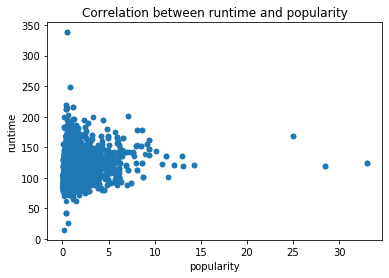

In [306]:
#Plotting the correlation between runtime and popularity
dfnew.plot(x='popularity', y='runtime', kind='scatter',title='Correlation between runtime and popularity');

Both the corr() operation and the plot show low positive correlation between runtime and popularity. 

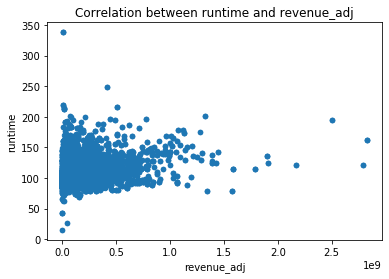

In [307]:
#Plotting the correlation between runtime and revenue_adj
dfnew.plot(x='revenue_adj', y='runtime', kind='scatter',title='Correlation between runtime and revenue_adj');

In [287]:
#Finding the correlation between runtime and popularity
dfnew[['revenue_adj','runtime']].corr()

,revenue_adj,runtime
revenue_adj,1.000,0.278
runtime,0.278,1.000


Both the corr() operation and the plot show low positive correlation between runtime and revenue. 

<a id='conclusions'></a>
## Conclusions

> Science Fiction, Adventure, Fantasy and Animation have highest popularity and highest revenue means across years and for year to year, they were the highest popular and revenue generating genres most number of times. Budget has a postive correlation with revenue and higher budget movies have much higher revenues. Runtime has positive correlation with vote average, popularity and revenue but this correlation is weak to moderate.

> Limitations: Statistical tests have not been conducted and hence statistical significance of results cannot be established. 